<a href="https://colab.research.google.com/github/Yarragunta-Manikanth/Price-Prediction-Analysis-of-used-cars/blob/main/Price_Prediction_Analysis_of_Used_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
#Dataset Insertion
df = pd.read_csv('/content/carsdatafinalll.csv')
df.head()



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,color,damage
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,blue,20
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,red,15
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,yellow,15
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.4,10.0,102,5500,24,30,13950,white,20
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.4,8.0,115,5500,18,22,17450,silver,15


In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'color', 'damage'],
      dtype='object')

In [ ]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,color,damage
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,silver,15
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,brown,15
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,blue,10
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.4,23.0,106,4800,26,27,22470,red,10
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,19,25,22625,white,10


In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,color,damage
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,blue,20
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,red,15
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,yellow,15
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.4,10.0,102,5500,24,30,13950,white,20
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.4,8.0,115,5500,18,22,17450,silver,15


In [ ]:
data = df

# Finding the missing values
data.isna().any()

# Finding if missing values
data.isnull().any()


symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
color                False
damage               False
dtype: bool

In [ ]:
data.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


<ipython-input-51-8b21f796b7a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data['length'] / data['length'].max()
<ipython-input-51-8b21f796b7a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['width'] = data['width'] / data['width'].max()
<ipython-input-51-8b21f796b7a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
200       Low
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 201, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


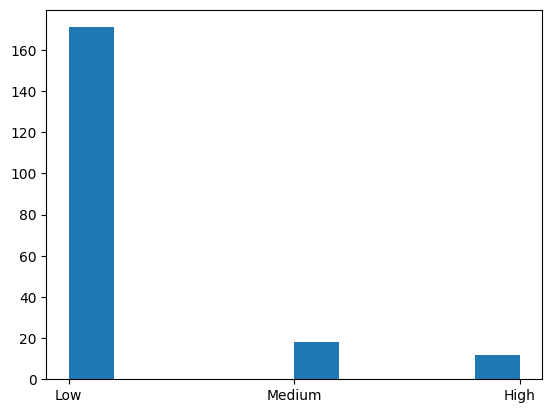

In [ ]:
# Convert 'price' column to numeric if it's not already
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Drop rows with missing 'price' values
data = data.dropna(subset=['price'])

data['length'] = data['length'] / data['length'].max()
data['width'] = data['width'] / data['width'].max()
data['height'] = data['height'] / data['height'].max()

# binning- grouping values
bins = np.linspace(min(data['price']), max(data['price']), 4)
group_names = ['Low', 'Medium', 'High']
data['price-binned'] = pd.cut(data['price'], bins, labels=group_names, include_lowest=True)

# Print and plot
print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()


In [ ]:
# categorical to numerical variables
pd.get_dummies(data['fuel-type']).head()
# descriptive analysis
# NaN are skipped
data.describe()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,damage
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353,19.900498
std,1.254802,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342,7.549175
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000,0.000000
25%,0.000000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000,15.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000,25.000000
75%,2.000000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000,25.000000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000,30.000000


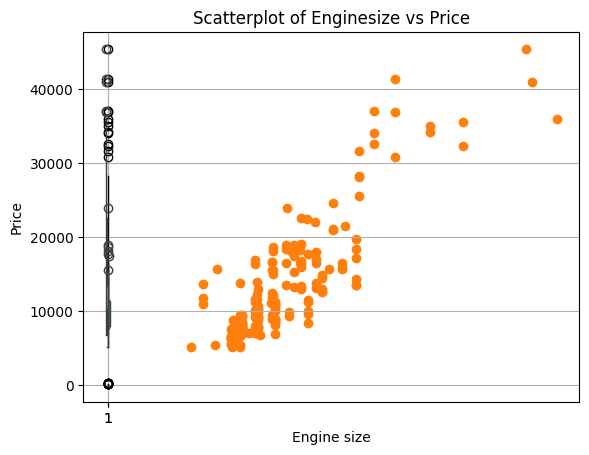

In [ ]:
# examples of box plot
plt.boxplot(data['price'])
plt.boxplot(data['engine-size'])
# by using seaborn
sns.boxplot(x ='drive-wheels', y ='price', data = data)
# Predicting price based on engine size
# Known on x and predictable on y
plt.scatter(data['engine-size'], data['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()




In [ ]:
# Grouping Data
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'],
						as_index = False).mean()
data_grp


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [ ]:
# pivot method
data_pivot = data_grp.pivot(index = 'drive-wheels',
							columns = 'body-style')
data_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

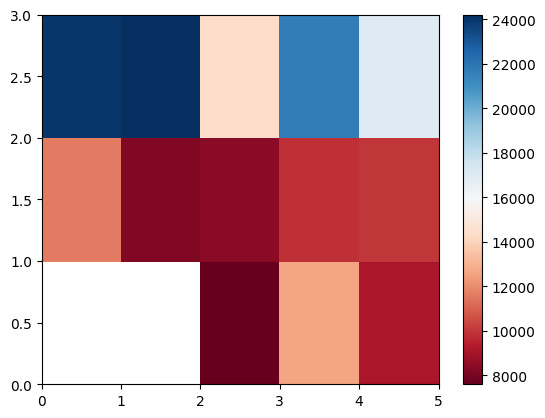

In [ ]:


# heatmap for visualizing data
plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()


F_onewayResult(statistic=7.190277700882485, pvalue=0.01577305257292858)


(0.0, 53522.22245693498)

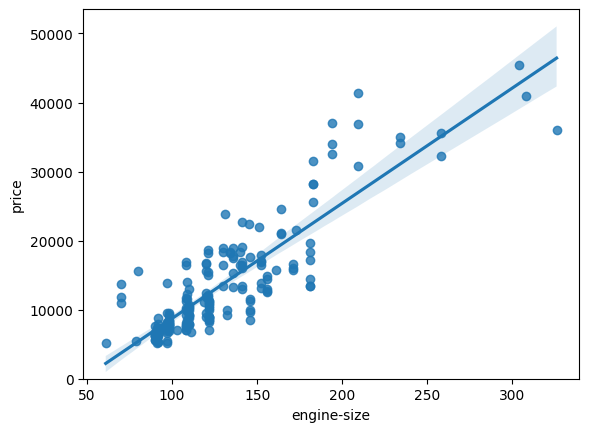

In [ ]:
# Analysis of Variance- ANOVA
# returns f-test and p-value
# f-test = variance between sample group means divided by
# variation within sample group
# p-value = confidence degree
data_annova = data[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(
							grouped_annova.get_group('volvo')['price'],
							grouped_annova.get_group('bmw')['price']
									)
print(annova_results_l)

# strong corealtion between a categorical variable
# if annova test gives large f-test and small p-value

# Correlation- measures dependency, not causation
sns.regplot(x ='engine-size', y ='price', data = data)
plt.ylim(0, )


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(data['price'], data['make'])

# Display the results
print(tukey_results.summary())


             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1        group2      meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------------
  alfa-romero          audi   2360.8333    1.0  -7432.1228  12153.7895  False
  alfa-romero           bmw  10620.4167 0.0097    1244.375  19996.4583   True
  alfa-romero     chevrolet  -9491.3333 0.2401  -20799.265   1816.5984  False
  alfa-romero         dodge  -7622.8889 0.2678 -16855.7765   1609.9987  False
  alfa-romero         honda   -7313.641 0.2702 -16184.3125   1557.0304  False
  alfa-romero         isuzu  -6581.8333 0.9526 -19224.4853   6060.8187  False
  alfa-romero        jaguar  19101.6667    0.0    7793.735  30409.5984   True
  alfa-romero         mazda   -4845.451 0.9094 -13518.2387   3827.3367  False
  alfa-romero mercedes-benz  18148.6667    0.0    8772.625  27524.7083   True
  alfa-romero       mercury   1004.6667    1.0 -14987.1637   169

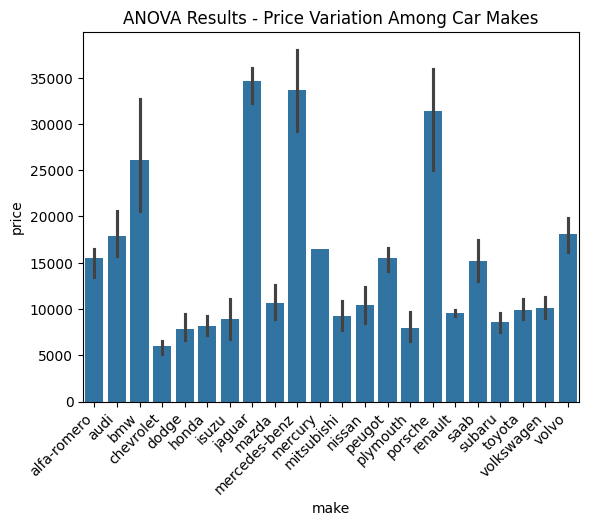

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'make' is a categorical variable and 'price' is the numerical variable
sns.barplot(x='make', y='price', data=data)
plt.title('ANOVA Results - Price Variation Among Car Makes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # You can adjust the rotation angle as needed

plt.show()

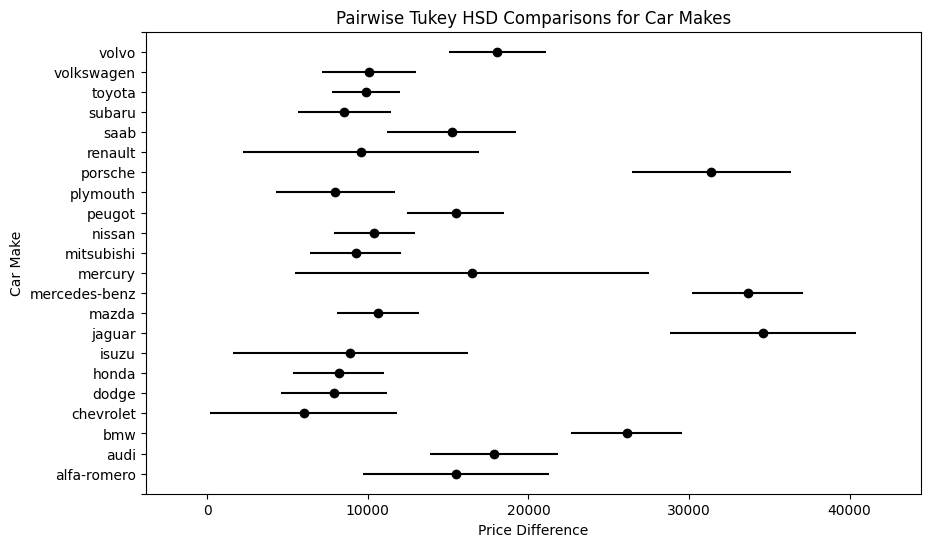

In [ ]:
# Visualize pairwise comparisons using a bar plot
tukey_results.plot_simultaneous(ylabel='Car Make', xlabel='Price Difference')
plt.title('Pairwise Tukey HSD Comparisons for Car Makes')
plt.show()


<ipython-input-61-5e766294cdd4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


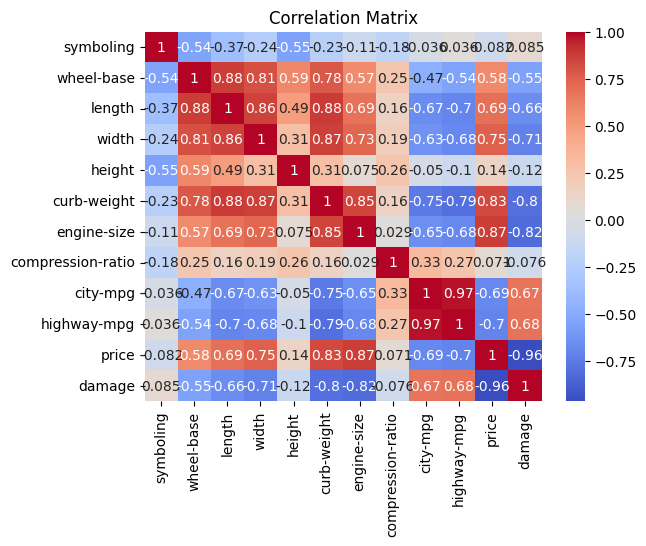

In [ ]:
# Explore the correlation matrix for numerical variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


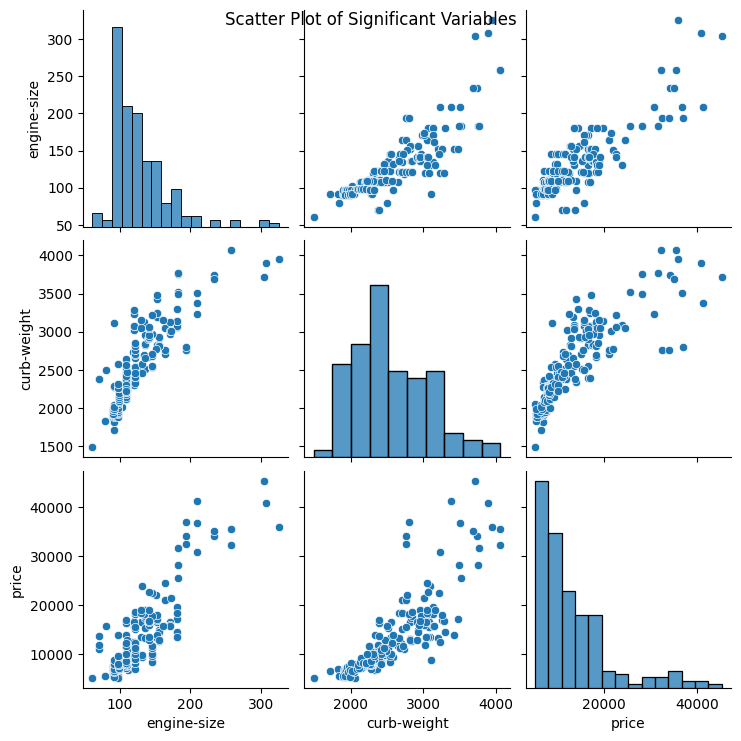

In [ ]:
# Scatter plot for significant variables identified in the correlation matrix
significant_variables = ['engine-size', 'horsepower', 'curb-weight', 'price']
sns.pairplot(data[significant_variables])
plt.suptitle('Scatter Plot of Significant Variables')
plt.show()

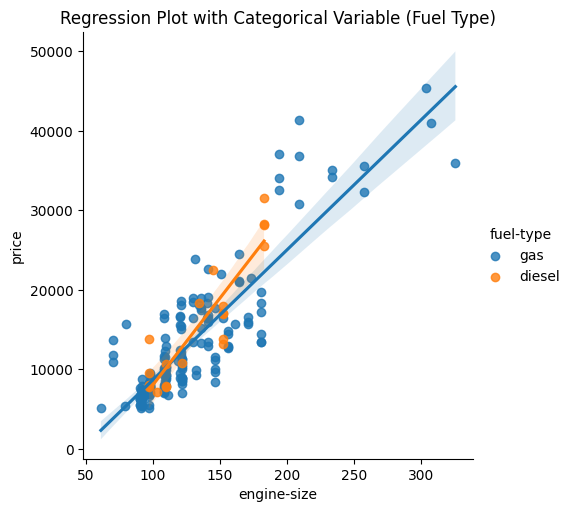

In [ ]:
# Regression plot considering a categorical variable
sns.lmplot(x='engine-size', y='price', hue='fuel-type', data=data)
plt.title('Regression Plot with Categorical Variable (Fuel Type)')
plt.show()


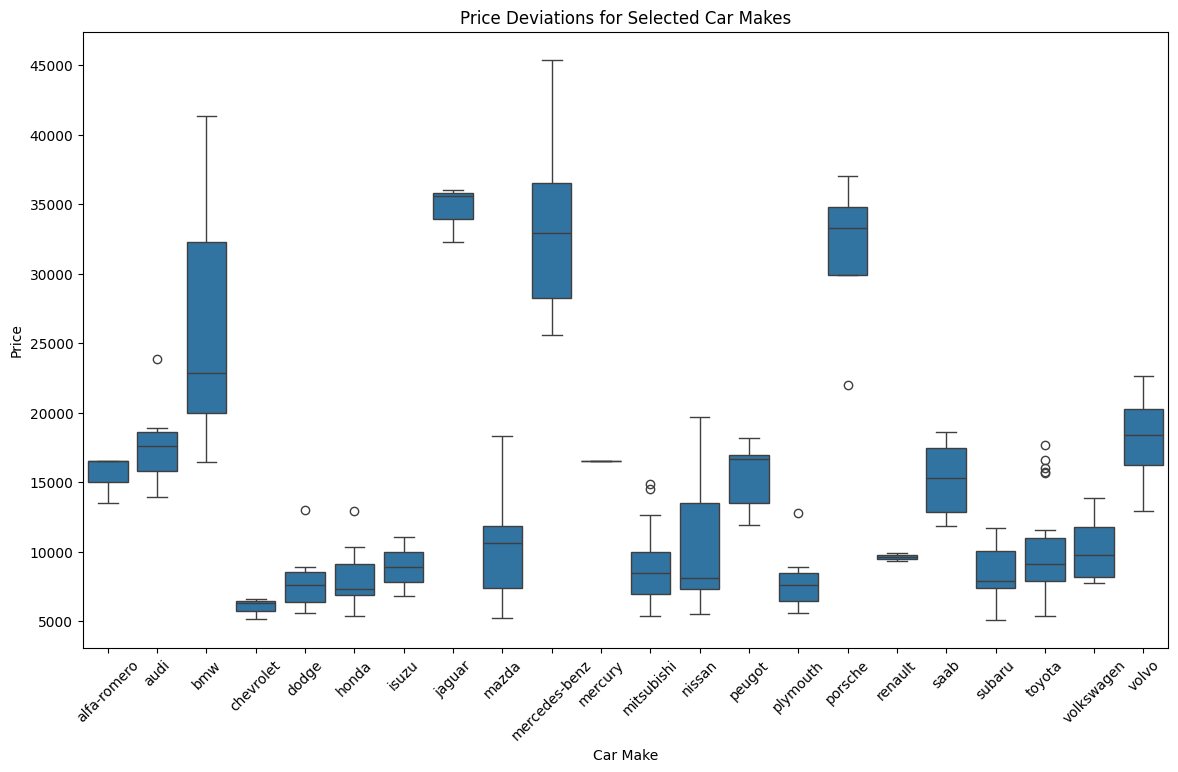

In [ ]:
# Convert 'price' column to numeric if it's not already
selected_data = pd.DataFrame(data)

# Convert 'price' column to numeric if it's not already
selected_data['price'] = pd.to_numeric(selected_data['price'], errors='coerce')

# Check if 'make' column is categorical
selected_data['make'] = selected_data['make'].astype('category')

# Box plot to visualize price deviations for the selected car makes
plt.figure(figsize=(14, 8))  # Increase width of the plot
sns.boxplot(x='make', y='price', data=selected_data)
plt.title('Price Deviations for Selected Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

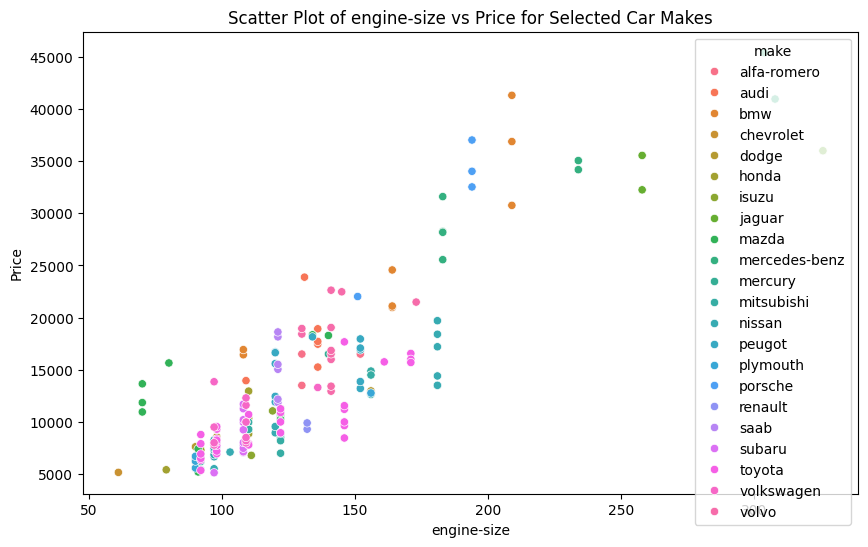

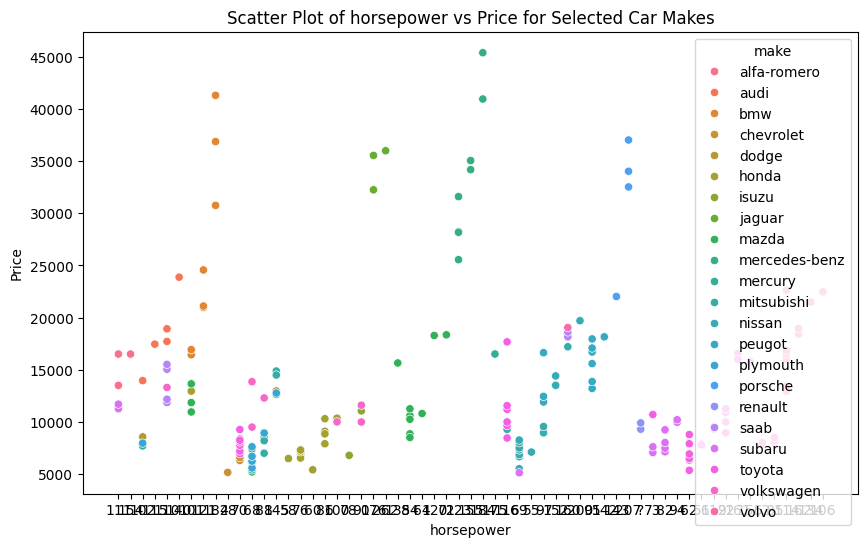

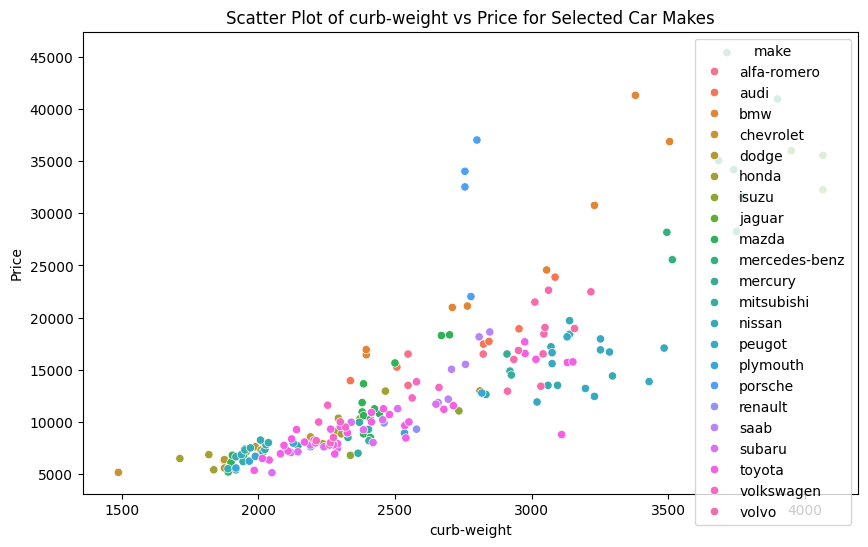

In [ ]:
# Further exploration of influential features
# Scatter plots for numeric features against price for the selected car makes
numeric_features = ['engine-size', 'horsepower', 'curb-weight']
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='price', hue='make', data=selected_data)
    plt.title(f'Scatter Plot of {feature} vs Price for Selected Car Makes')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

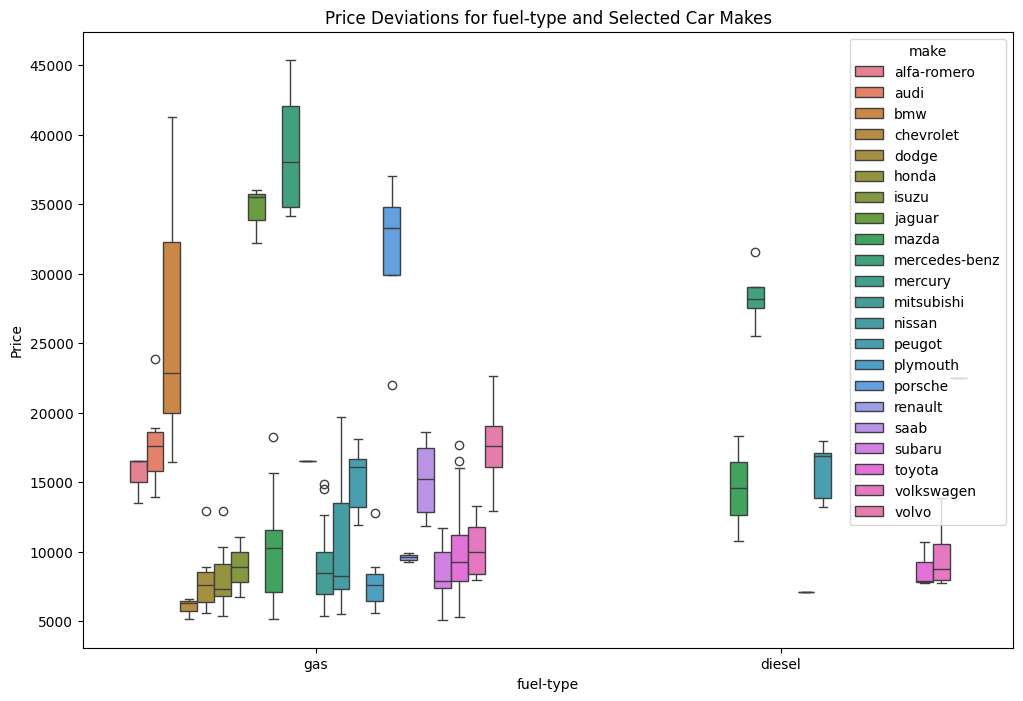

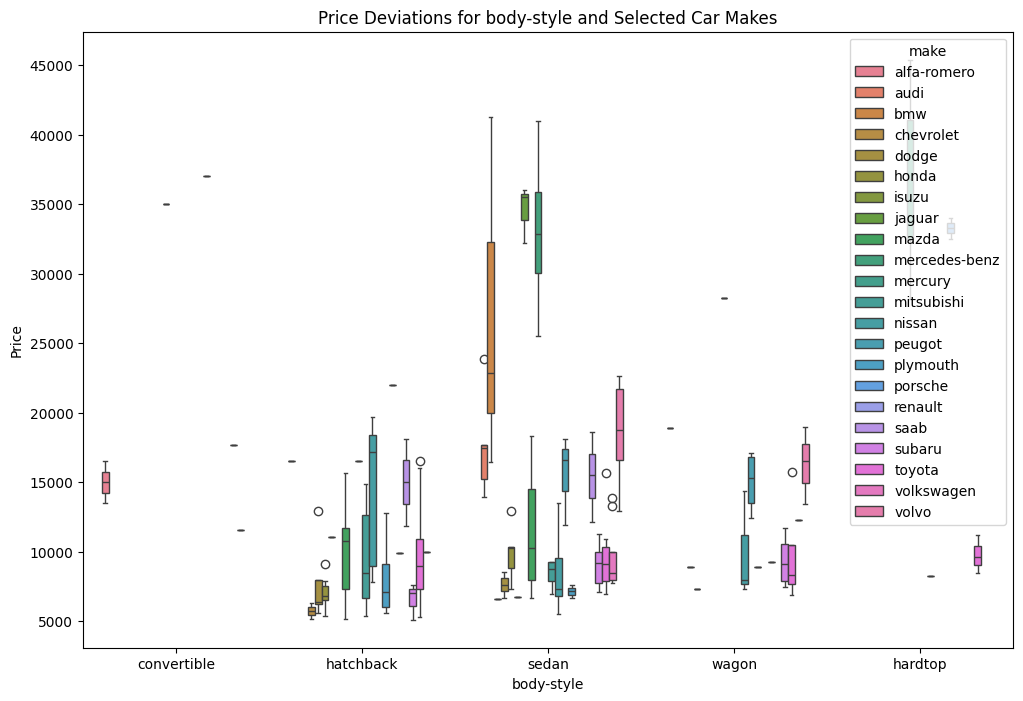

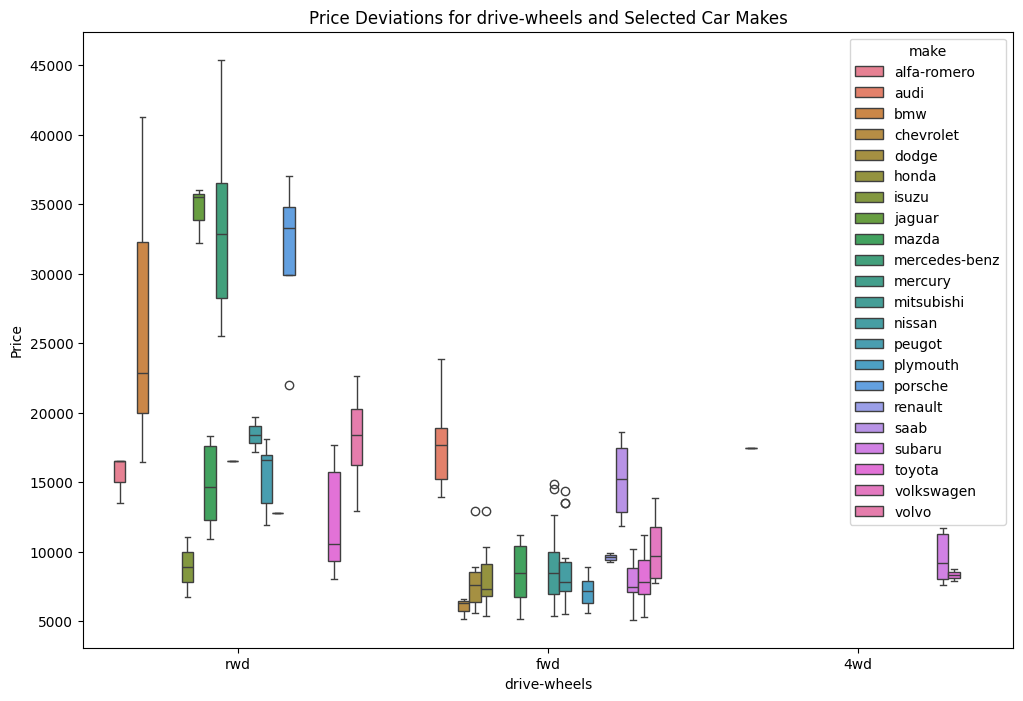

In [ ]:
# Explore categorical features for the selected car makes
# Box plot for categorical features (e.g., fuel-type) against price
categorical_features = ['fuel-type', 'body-style', 'drive-wheels']
for feature in categorical_features:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=feature, y='price', hue='make', data=selected_data)
    plt.title(f'Price Deviations for {feature} and Selected Car Makes')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

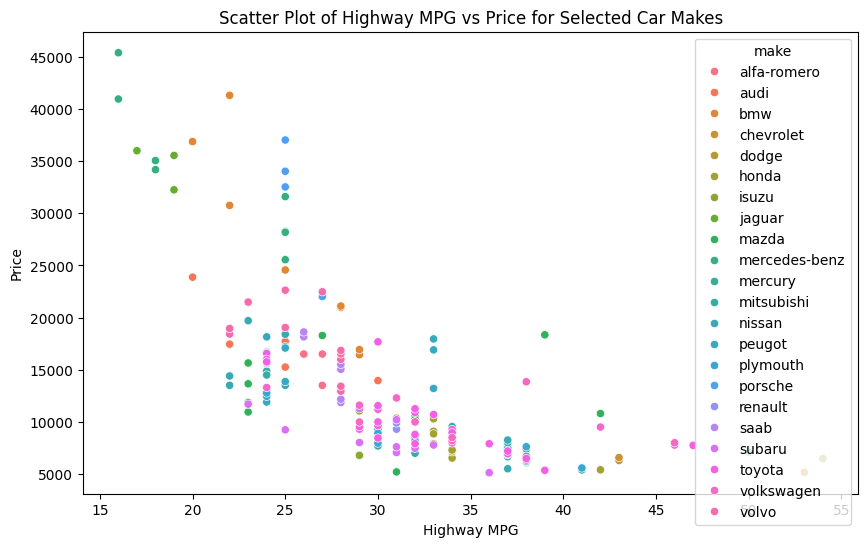

In [ ]:
#Explore the relationship between mileage and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='highway-mpg', y='price', hue='make', data=selected_data)
plt.title('Scatter Plot of Highway MPG vs Price for Selected Car Makes')
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.show()

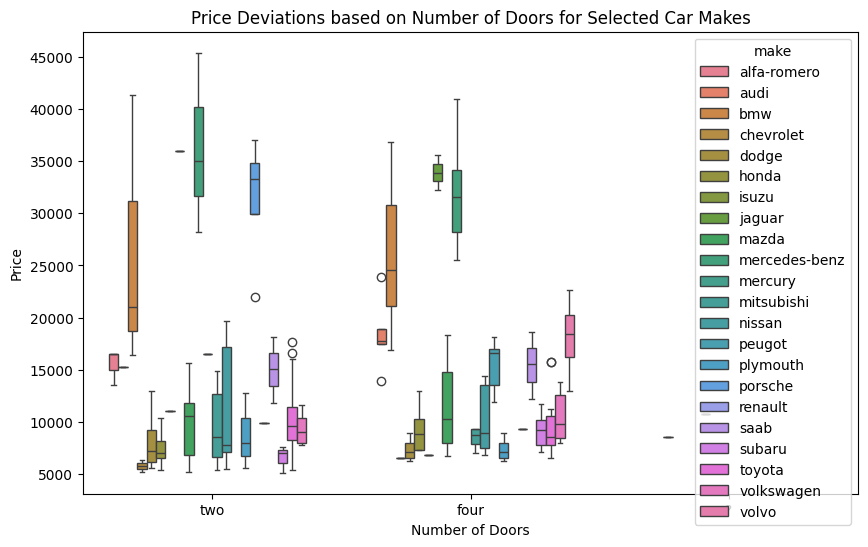

In [ ]:
#Explore the impact of the number of doors on price
plt.figure(figsize=(10, 6))
sns.boxplot(x='num-of-doors', y='price', hue='make', data=selected_data)
plt.title('Price Deviations based on Number of Doors for Selected Car Makes')
plt.xlabel('Number of Doors')
plt.ylabel('Price')
plt.show()